In [18]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import numpy as np
import pandas as pd
import statistics
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import json
import requests
import math
%matplotlib inline


plt.style.use('ggplot')

In [19]:
crime_full_df = pd.read_csv('../data/crimes_by_county.csv')
crime_full_df.head(5)

,County,Agency,Year,Months Reported,Index Total,Violent Total,Murder,Rape,Robbery,Aggravated Assault,Property Total,Burglary,Larceny,Motor Vehicle Theft,Region
0,Albany,Albany City PD,2021,12.0,3837.0,945.0,24.0,60.0,179.0,682.0,2892.0,368.0,2170.0,354.0,Non-New York City
1,Albany,Albany County Sheriff,2021,12.0,73.0,18.0,0.0,0.0,1.0,17.0,55.0,9.0,41.0,5.0,Non-New York City
2,Albany,Albany County State Police,2021,12.0,125.0,43.0,0.0,27.0,1.0,15.0,82.0,7.0,66.0,9.0,Non-New York City
3,Albany,Altamont Vg PD,2021,12.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,Non-New York City
4,Albany,Bethlehem Town PD,2021,12.0,329.0,22.0,1.0,5.0,4.0,12.0,307.0,27.0,269.0,11.0,Non-New York City


In [20]:
crime_full_df['Agency'] == 'County Total'

0        False
1        False
2        False
3        False
4        False
         ...  
21818     True
21819    False
21820    False
21821    False
21822    False
Name: Agency, Length: 21823, dtype: bool

In [21]:
# Dropped county total from Agency row due to not originally knowing about it and it fudging crime rate stats
murder_aggravated_robbery = crime_full_df[crime_full_df['Agency'] == 'County Total'].index
murder_aggravated_robbery.drop(murder_aggravated_robbery,)

Int64Index([], dtype='int64')

In [22]:
murder_aggravated_robbery = crime_full_df[['County', 'Year', 'Murder', 'Aggravated Assault', 'Robbery']]
murder_aggravated_robbery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21823 entries, 0 to 21822
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   County              21823 non-null  object 
 1   Year                21823 non-null  int64  
 2   Murder              21439 non-null  float64
 3   Aggravated Assault  21439 non-null  float64
 4   Robbery             21439 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 852.6+ KB


In [23]:
murder_aggravated_robbery['Murder'].fillna(0)
murder_aggravated_robbery['Aggravated Assault'].fillna(0)
murder_aggravated_robbery['Robbery'].fillna(0)

0        179.0
1          1.0
2          1.0
3          0.0
4          4.0
         ...  
21818      0.0
21819      0.0
21820      0.0
21821      0.0
21822      0.0
Name: Robbery, Length: 21823, dtype: float64

In [24]:
murder_aggravated_robbery['Murder'].fillna(0)
murder_aggravated_robbery['Aggravated Assault'].fillna(0)
murder_aggravated_robbery['Robbery'].fillna(0)

0        179.0
1          1.0
2          1.0
3          0.0
4          4.0
         ...  
21818      0.0
21819      0.0
21820      0.0
21821      0.0
21822      0.0
Name: Robbery, Length: 21823, dtype: float64

In [25]:
train_test_split(murder_aggravated_robbery, test_size=.25)

[            County  Year  Murder  Aggravated Assault  Robbery
 19033       Broome  1993     0.0                56.0      1.0
 3946      Dutchess  2015     2.0               139.0     70.0
 20736       Oneida  1991    11.0                54.0    162.0
 17278       Orange  1996     0.0                18.0      1.0
 21039        Wayne  1991     2.0               155.0     20.0
 ...            ...   ...     ...                 ...      ...
 19696       Albany  1992     0.0                22.0     34.0
 8211   Schenectady  2009     7.0               346.0    258.0
 3763   Westchester  2016     0.0                 0.0      1.0
 12543       Putnam  2003     0.0                 0.0      0.0
 18249  Westchester  1995     0.0                 4.0      7.0
 
 [16367 rows x 5 columns],
             County  Year  Murder  Aggravated Assault  Robbery
 18931        Wayne  1994     1.0                37.0      0.0
 4830        Orange  2014     0.0                 0.0      0.0
 9420        Nassau  2007 

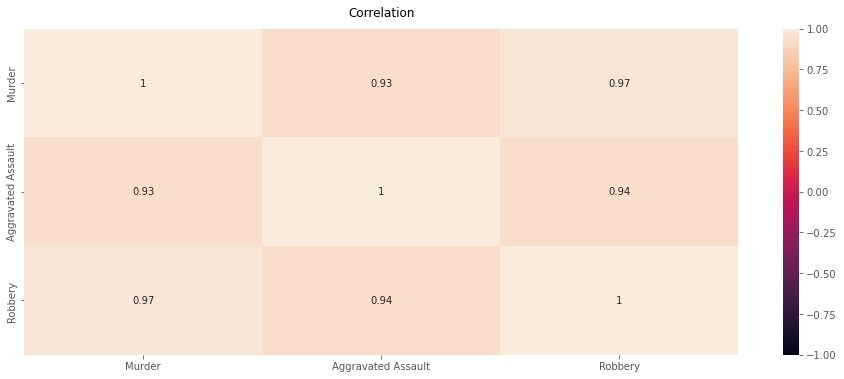

In [40]:
plt.figure(figsize=(16, 6))
colormap = sns.color_palette("rocket_r")
xall=murder_aggravated_robbery[['Murder', 'Aggravated Assault', 'Robbery']]
heatmap = sns.heatmap(xall.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation', fontdict={'fontsize':12}, pad=12);

In [27]:
murder_aggravated_robbery16 = murder_aggravated_robbery.loc[murder_aggravated_robbery['Year'] == 2016]
murder_aggravated_robbery17 = murder_aggravated_robbery.loc[murder_aggravated_robbery['Year'] == 2017]
murder_aggravated_robbery18 = murder_aggravated_robbery.loc[murder_aggravated_robbery['Year'] == 2018]
murder_aggravated_robbery19 = murder_aggravated_robbery.loc[murder_aggravated_robbery['Year'] == 2019]
murder_aggravated_robbery20 = murder_aggravated_robbery.loc[murder_aggravated_robbery['Year'] == 2020]

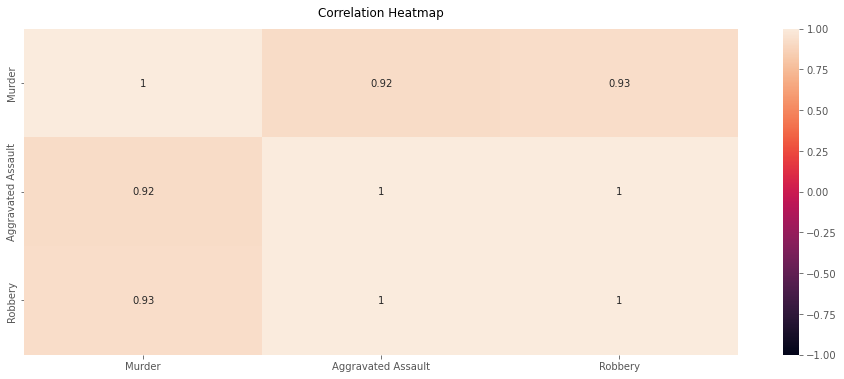

In [28]:
plt.figure(figsize=(16, 6))
x16= murder_aggravated_robbery16[['Murder', 'Aggravated Assault', 'Robbery']]
heatmap = sns.heatmap(x16.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

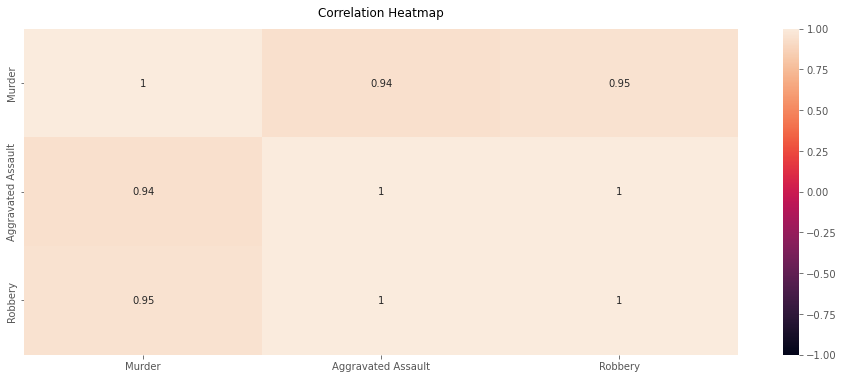

In [29]:
plt.figure(figsize=(16, 6))
x17= murder_aggravated_robbery17[['Murder', 'Aggravated Assault', 'Robbery']]
heatmap = sns.heatmap(x17.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

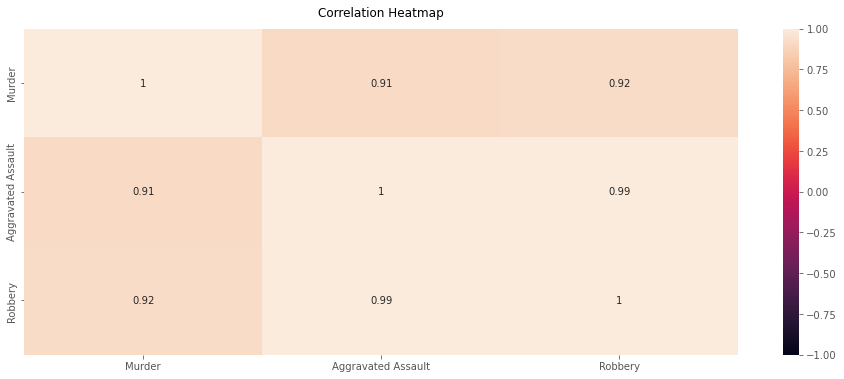

In [30]:
plt.figure(figsize=(16, 6))
x18= murder_aggravated_robbery18[['Murder', 'Aggravated Assault', 'Robbery']]
heatmap = sns.heatmap(x18.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

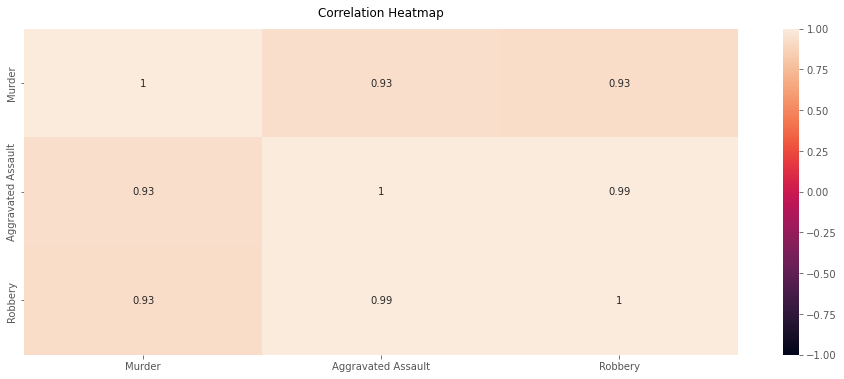

In [31]:
plt.figure(figsize=(16, 6))
x19= murder_aggravated_robbery19[['Murder', 'Aggravated Assault', 'Robbery']]
heatmap = sns.heatmap(x19.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

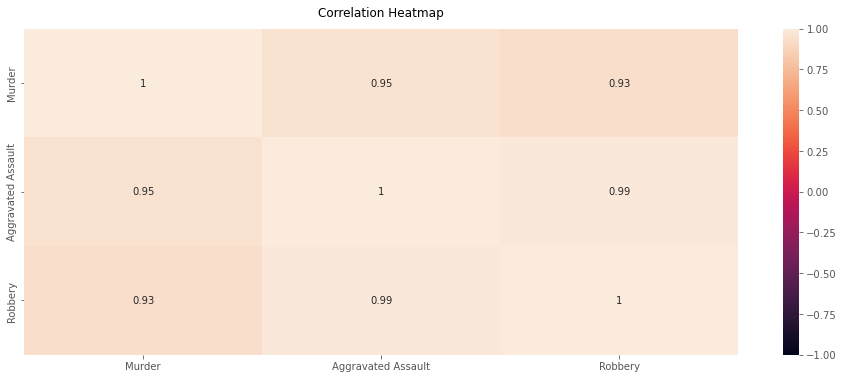

In [32]:
plt.figure(figsize=(16, 6))
x20= murder_aggravated_robbery20[['Murder', 'Aggravated Assault', 'Robbery']]
heatmap = sns.heatmap(x20.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [33]:
# Welchs Ttest... unk std = Failed to reject Null
stats.ttest_ind(without_trans, with_trans, equal_var=False, alternative='greater')

NameError: name 'without_trans' is not defined

In [ ]:
reg =linear_model.LinearRegression()
reg.fit(murder_aggravated_robbery[['Aggravated Assault', 'Robbery']], murder_aggravated_robbery.Murder)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').